## Get all the costs results :

In [1]:
import pandas as pd
#sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/MCBAP-multi-port-berth-allocation-problem/results_jobs/benchmarks_CPLEX/CPLEX_N4_N15_results_5min.csv"
sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/CPLEX_NLarge_results_600s.csv"
sourceHeur = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_HEUR"
algo_folder="orderedGRASPparam"
expnb=4
exp="exp4biginst10mins"
Nmin=11
Nmax=15

def get_results_cost(type):
    dataCPLEX = pd.read_csv(sourceCPLEX)
    if type == 'large':
        dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/NLarge.csv")
    else:
        for i in range(Nmin, Nmax):
            this_dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{i}_N{i}.csv")
            dataHeur = pd.concat([dataHeur, this_dataHeur], ignore_index=True)
    merged_df = pd.merge(dataCPLEX, dataHeur, how='inner', on=['Seed', 'N', 'Nout', 'qli'])
    merged_df["diff"] = (merged_df["HeurCost"] - merged_df["CPLEX"])/merged_df["CPLEX"]*100
    if type == 'large':
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/Large_diff.csv", index=False)
    else:
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{Nmin}_N{Nmax}_diff{exp}.csv", index=False)
    return merged_df
merged_df = get_results_cost('large')


In [2]:
merged_df[merged_df["N"]>0]

,Seed,N,Nout,qli,Time,CPLEX,Box,HeurCost,diff
1,1,30,10,10,620,8593461,NaN,8386143,-2.412509
2,1,30,10,20,601,9823106,NaN,7690121,-21.713957
3,1,30,10,40,601,10094299,"####The port 2, the first box : [112,142] and ...",8838012,-12.445510
4,1,30,10,80,601,11437944,"####The port 3, the first box : [90,127] and [...",9863323,-13.766644
5,1,30,5,10,601,3378355,NaN,5157094,52.651039
...,...,...,...,...,...,...,...,...,...
188,10,70,10,80,601,515375209,"####The port 2, the first box : [105,137] and ...",58389696,-88.670449
189,10,70,5,10,601,50491610,NaN,43830445,-13.192618
190,10,70,5,20,601,55284289,NaN,40617027,-26.530615
191,10,70,5,40,602,188911888,NaN,42526553,-77.488684


In [3]:
len(merged_df[merged_df["diff"]>0])

59

## Get results in json :

In [4]:
from getdict_results import *

In [5]:
seed=1
Nin=30
qli=10
Nout=5

In [6]:
results = getiterfromfileHEUR(Nin,Nout,seed,qli,algo_folder,exp)
results

23    [0.3333, 0.3333, 0.3333]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype

{1: {'x': {1: {1: 11, 2: 145},
   2: {1: 33, 2: 1, 3: 176},
   3: {1: 94, 2: 1},
   4: {1: 48, 2: 88, 3: 25},
   5: {1: 113, 2: 61},
   6: {1: 114, 2: 64},
   7: {1: 72, 2: 21, 3: 185},
   8: {1: 124, 2: 146},
   9: {1: 59, 2: 3},
   10: {1: 16, 2: 104},
   11: {1: 99, 2: 112, 3: 75},
   12: {1: 1, 2: 52},
   13: {1: 102, 2: 32},
   14: {1: 155, 2: 96},
   15: {1: 52, 2: 46, 3: 165},
   16: {1: 78, 2: 41},
   17: {1: 149, 2: 1},
   18: {1: 41, 2: 1, 3: 74},
   19: {1: 151, 2: 1},
   20: {1: 71, 2: 125},
   21: {1: 2, 2: 115},
   22: {1: 124, 2: 1, 3: 128},
   23: {1: 113, 2: 8},
   24: {1: 81, 2: 84},
   25: {1: 21, 2: 60, 3: 83},
   26: {1: 48, 2: 30},
   27: {1: 98, 2: 74},
   28: {1: 10, 2: 121},
   29: {1: 41, 2: 126},
   30: {1: 88, 2: 143},
   31: {1: 1.0},
   32: {1: 61.0},
   33: {1: 31.0},
   34: {1: 61.0},
   35: {1: 121.0},
   36: {1: 121.0},
   37: {1: 121.0},
   38: {1: 151.0},
   39: {1: 31.0},
   40: {1: 91.0},
   41: {1: 31.0},
   42: {1: 91.0},
   43: {1: 121.0},
   44

In [7]:
iteration_number = len(results)
iter_to_plot = iteration_number
nb_iter=len(results)

## Get vizualization from the sol 

In [8]:
file = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/sols_300s/CPLEX_sol_{}_{}_{}_{}.csv".format(seed,Nin,Nout,qli)
results_sol = pd.read_csv(file)
listx=list(results_sol[results_sol['first']=='x']['second'])[0].replace(' ','').split('\n')
listx

['[1,1]=1.0',
 '[1,2]=150.0',
 '[10,1]=63.0',
 '[10,2]=107.0',
 '[11,1]=139.0',
 '[11,2]=111.0',
 '[11,3]=92.0',
 '[12,1]=1.0',
 '[12,2]=1.0',
 '[13,1]=90.0',
 '[13,2]=32.0',
 '[14,1]=155.0',
 '[14,2]=46.0',
 '[15,1]=63.0',
 '[15,2]=30.0',
 '[15,3]=161.0',
 '[16,1]=30.0',
 '[16,2]=44.0',
 '[17,1]=95.0',
 '[17,2]=31.0',
 '[18,1]=83.0',
 '[18,2]=0.0',
 '[18,3]=71.0',
 '[19,1]=155.0',
 '[19,2]=66.0',
 '[2,1]=58.0',
 '[2,2]=20.0',
 '[2,3]=151.0',
 '[20,1]=0.0',
 '[20,2]=127.0',
 '[21,1]=1.0',
 '[21,2]=144.0',
 '[22,1]=139.0',
 '[22,2]=40.0',
 '[22,3]=114.0',
 '[23,1]=126.0',
 '[23,2]=11.0',
 '[24,1]=60.0',
 '[24,2]=0.0',
 '[25,1]=7.0',
 '[25,2]=94.0',
 '[25,3]=91.0',
 '[26,1]=109.0',
 '[26,2]=1.0',
 '[27,1]=93.0',
 '[27,2]=61.0',
 '[28,1]=65.0',
 '[28,2]=84.0',
 '[29,1]=30.0',
 '[29,2]=130.0',
 '[3,1]=118.0',
 '[3,2]=36.0',
 '[30,1]=126.0',
 '[30,2]=146.0',
 '[31,1]=1.0',
 '[32,1]=61.0',
 '[33,1]=31.0',
 '[34,1]=61.0',
 '[35,1]=121.0',
 '[36,1]=121.0',
 '[37,1]=121.0',
 '[38,1]=151.0',
 '[

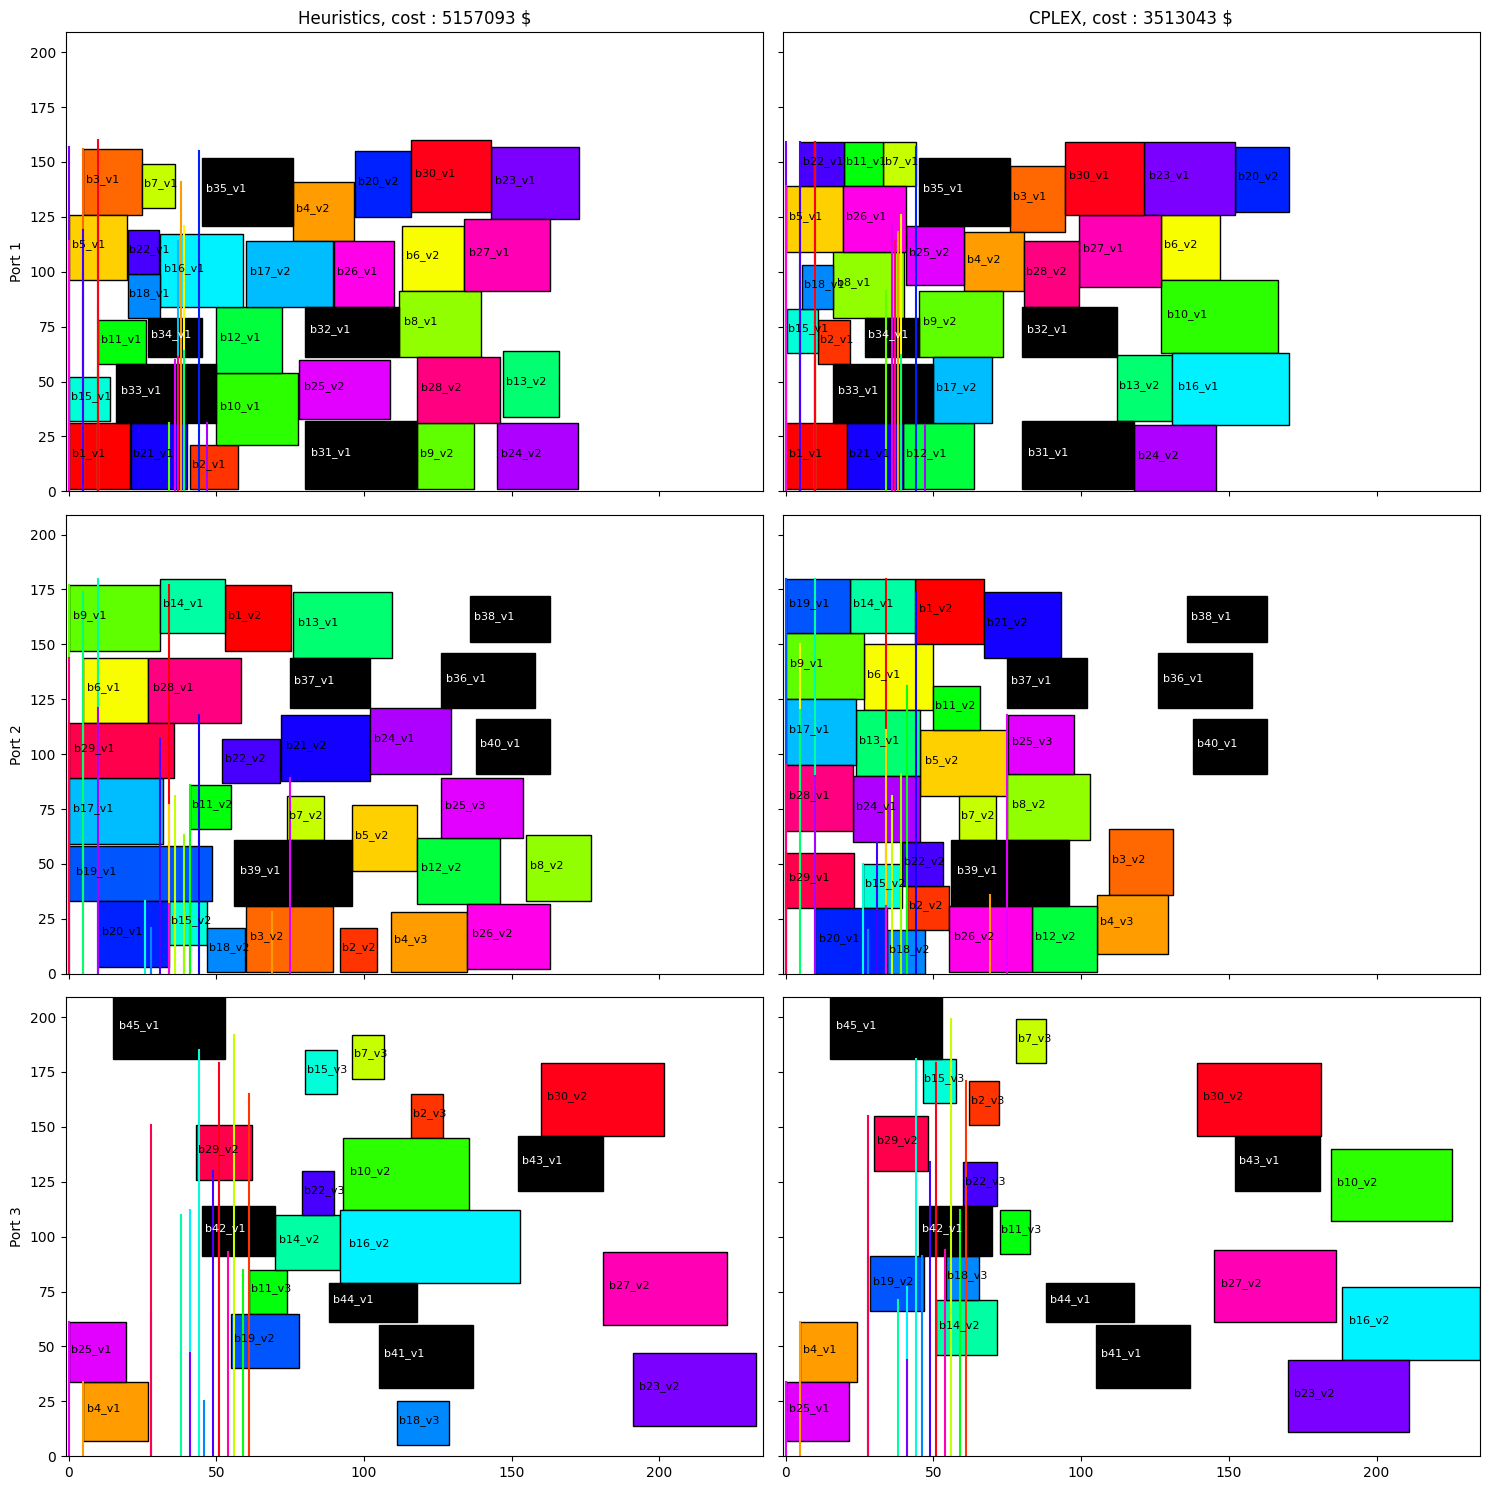

In [9]:
from make_graphs import *
getgraphs_port(algo_folder, exp, seed,Nin,Nout,qli, 'large', 5)

### Get visu from iteration :

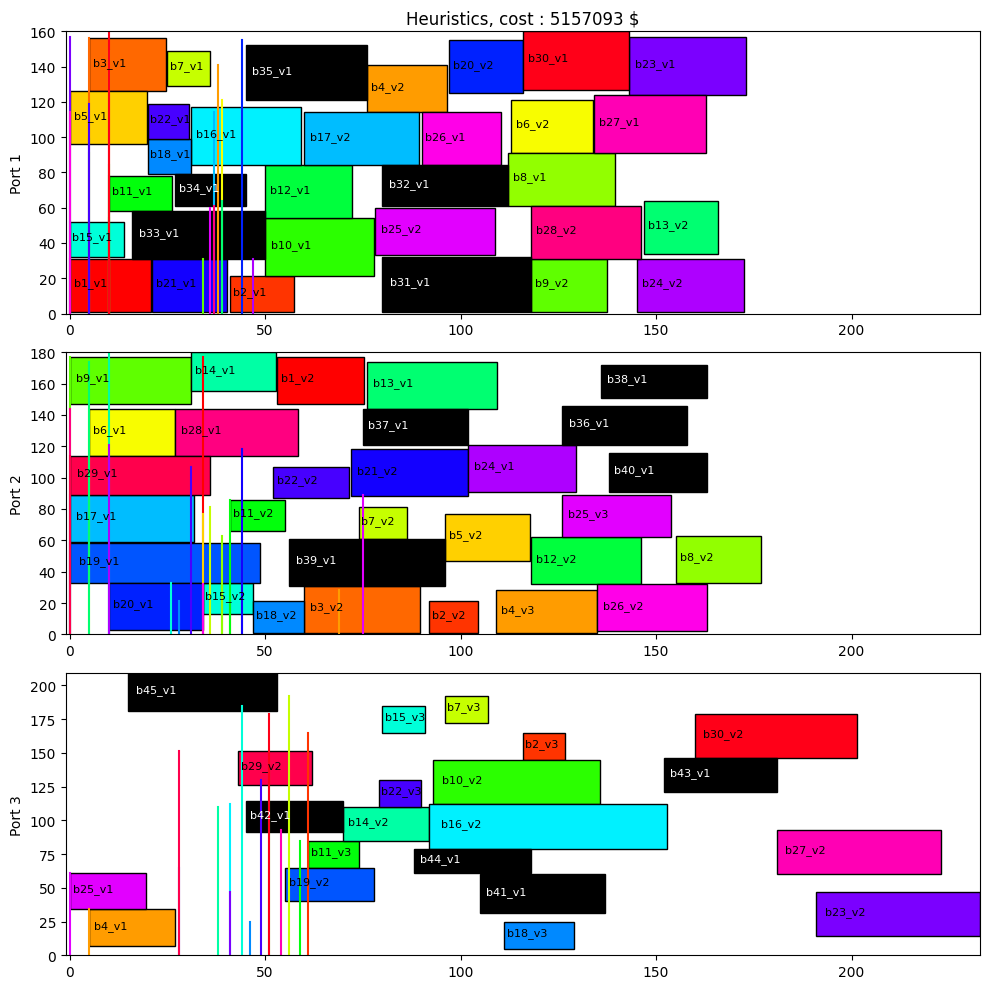

In [10]:
from make_graphs import *
getgraphs_port_withiter(algo_folder, exp, seed,Nin,Nout,qli,nb_iter, 'large', 5, withcplex=False)

## Cost analysis

- The cost of each visit in a bar graph with colors for each type of cost
- Looking at the time evolution (along iter) for the heuristic and the local search
- Same thing for the when evolution for each visit
- Same thing for the proba

--> Put everything, per solution and per iteration in a dataset.... (could use r)

In [11]:
dataset = make_datasetiter(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit','n','c', 'when']:
    dataset[col] = dataset[col].astype(int)

23    [0.3333, 0.3333, 0.3333]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype: object
23    [0.5, 0.5, 0.0]
Name: second, dtype

In [12]:
dataset

,iter,n,c,port,cost_visit,delay_cost_visit,when,tacticall_chosen,tacticboat_chosen,penalty_visit,...,fuel_cost_solheur,cost_sollocal,delay_cost_sollocal,waiting_cost_sollocal,penalty_sollocal,handling_cost_sollocal,fuel_cost_sollocal,timeheur,timelocal,failed
0,1,1,1,1,353230,48885,57,cost,time,265896,...,920269.0,7774711.0,1322093.0,82362.0,5165772.0,318382.0,886104.0,1.179,4.583,1.0
1,1,1,2,2,326627,47944,65,reconstruct,time,239623,...,920269.0,7774711.0,1322093.0,82362.0,5165772.0,318382.0,886104.0,1.179,4.583,1.0
2,1,2,1,1,155162,21285,42,cost,time,107895,...,920269.0,7774711.0,1322093.0,82362.0,5165772.0,318382.0,886104.0,1.179,4.583,1.0
3,1,2,2,2,131751,18712,44,cost,time,80746,...,920269.0,7774711.0,1322093.0,82362.0,5165772.0,318382.0,886104.0,1.179,4.583,1.0
4,1,2,3,3,118495,19963,46,cost,time,89087,...,920269.0,7774711.0,1322093.0,82362.0,5165772.0,318382.0,886104.0,1.179,4.583,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,84,28,2,1,212460,32385,52,cost,time,155896,...,870712.0,7154223.0,1272003.0,79932.0,4639014.0,331036.0,832240.0,1.015,4.250,1.0
5708,84,29,1,2,13626,0,10,cost,time,0,...,870712.0,7154223.0,1272003.0,79932.0,4639014.0,331036.0,832240.0,1.015,4.250,1.0
5709,84,29,2,3,16592,2681,21,cost,time,0,...,870712.0,7154223.0,1272003.0,79932.0,4639014.0,331036.0,832240.0,1.015,4.250,1.0
5710,84,30,1,1,273695,40497,53,cost,time,183975,...,870712.0,7154223.0,1272003.0,79932.0,4639014.0,331036.0,832240.0,1.015,4.250,1.0


In [13]:
print("Nb of iteration :")
print(max(dataset['iter']))

Nb of iteration :
84


In [14]:
dataset.columns

Index(['iter', 'n', 'c', 'port', 'cost_visit', 'delay_cost_visit', 'when',
       'tacticall_chosen', 'tacticboat_chosen', 'penalty_visit',
       'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit',
       'length', 'calls', 'inst', 'objectif', 'cost_solheur',
       'delay_cost_solheur', 'waiting_cost_solheur', 'penalty_solheur',
       'handling_cost_solheur', 'fuel_cost_solheur', 'cost_sollocal',
       'delay_cost_sollocal', 'waiting_cost_sollocal', 'penalty_sollocal',
       'handling_cost_sollocal', 'fuel_cost_sollocal', 'timeheur', 'timelocal',
       'failed'],
      dtype='object')

### The cost for each visit during the heuristic :

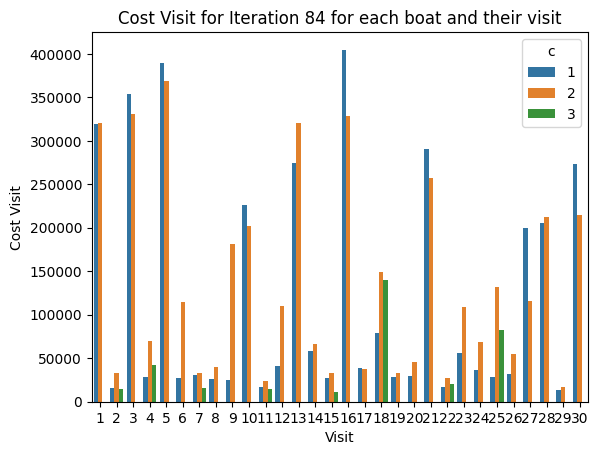

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to only include the desired iteration and boats
subset = dataset[(dataset['iter'] == iteration_number) & (dataset['n'] <= Nin)]

# Create a new figure and axis object
fig, ax = plt.subplots()

# Use seaborn's barplot function to create the plot
sns.barplot(x='n', y='cost_visit', hue='c', data=subset, ax=ax)

# Set the title and axis labels
ax.set_title(f"Cost Visit for Iteration {iteration_number} for each boat and their visit")
ax.set_xlabel("Visit")
ax.set_ylabel("Cost Visit")

# Show the plot
plt.show()


### The stacked costs now :

C:\Users\kerve\AppData\Local\Temp\ipykernel_17876\3078143974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iter[col] = df_iter[col].astype(int)


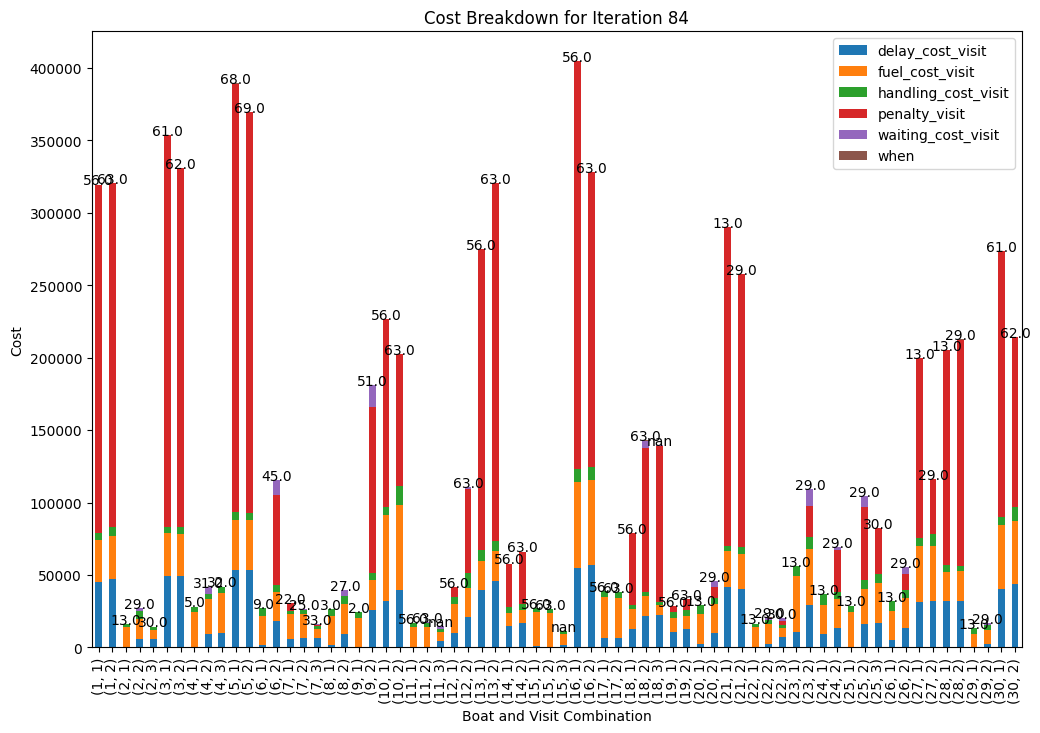

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# filter dataset for selected iteration
df_iter = dataset[dataset['iter'] == iter_to_plot]

for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c']:
    df_iter[col] = df_iter[col].astype(int)

# create a pivot table to group data by boat and visit
df_pivot = pd.pivot_table(df_iter[['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c', 'when']],
                           values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'when'],
                           index=['n', 'c'])

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title(f'Cost Breakdown for Iteration {iter_to_plot}')



for i in range(0,len(ax.get_xticklabels())):
    p=ax.patches[i+5*len(ax.get_xticklabels())]
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    nc = ax.get_xticklabels()[i].get_text()
    ax.text(_x, _y, np.mean(df_iter[(df_iter['n']==int(nc.split(',')[0][1])) & (df_iter['c']==int(nc.split(',')[1][1]))]['when']), ha="center")
    


# show plot
plt.show()


### Now along all the iterations :

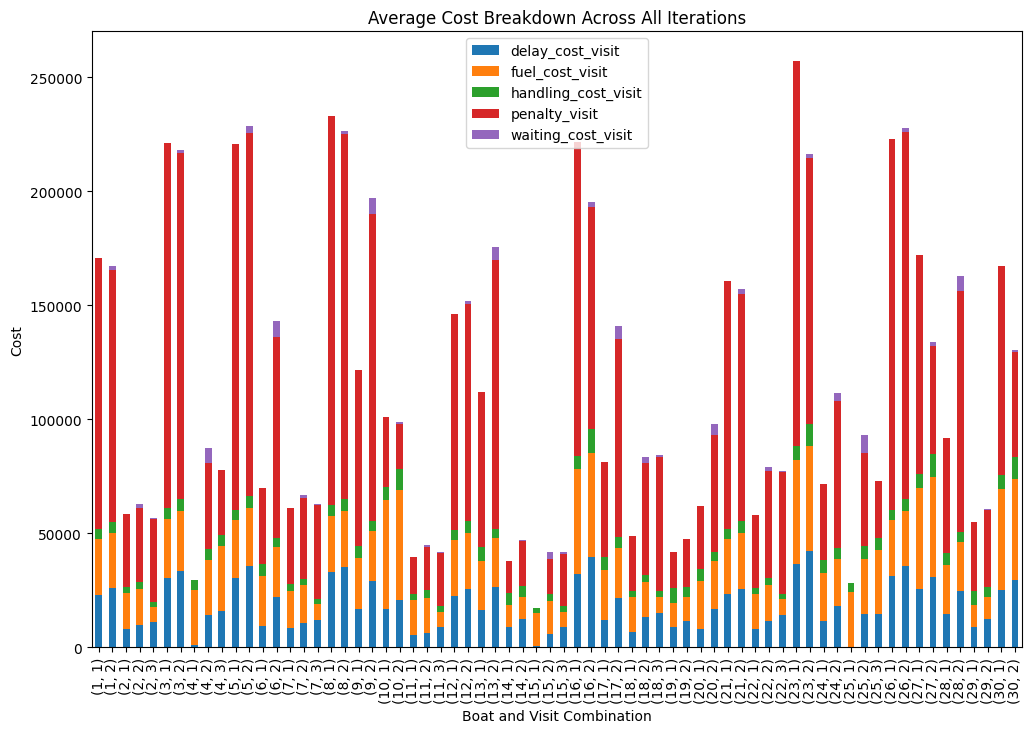

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# create a pivot table to group data by boat and visit, and calculate the mean of each cost across all iterations
df_pivot = pd.pivot_table(dataset, values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit'], index=['n', 'c'], aggfunc='mean')

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title('Average Cost Breakdown Across All Iterations')

# show plot
plt.show()


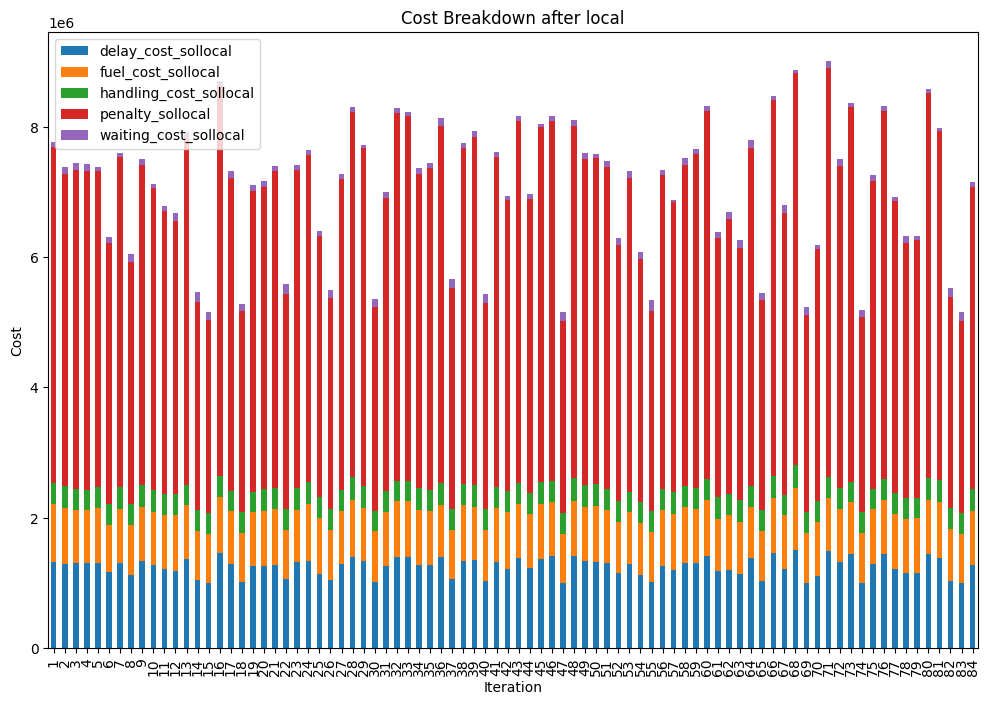

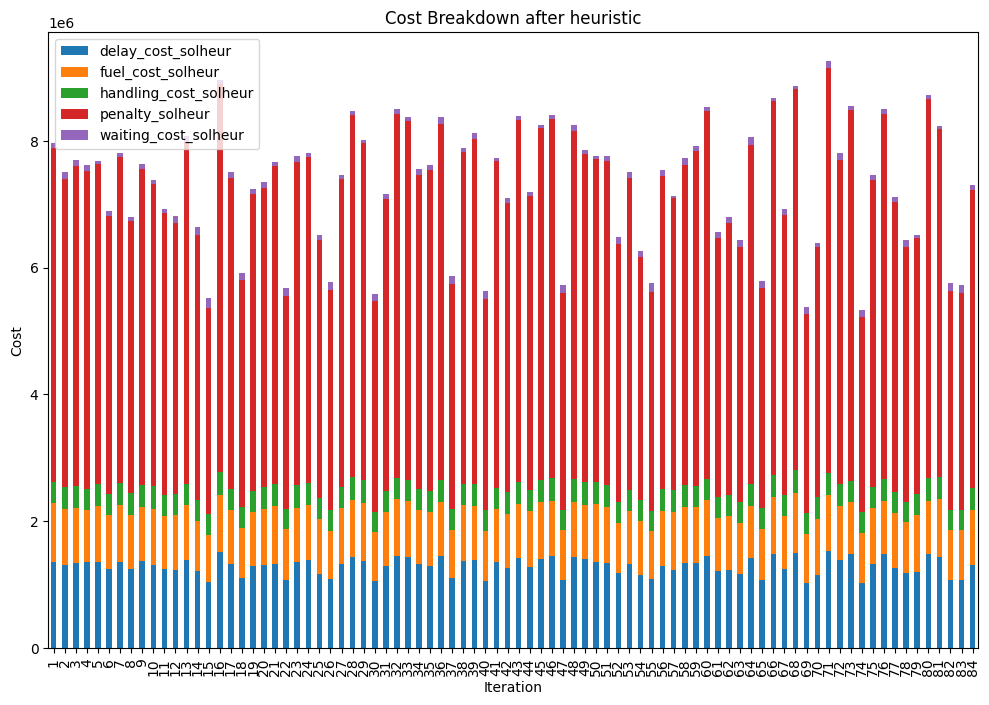

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataset
dataset_subset = dataset[dataset['iter'] <= nb_iter]
# create pivot table for solocal columns
df_pivot_solocal = pd.pivot_table(dataset_subset, values=['delay_cost_sollocal', 'penalty_sollocal', 'fuel_cost_sollocal', 'handling_cost_sollocal', 'waiting_cost_sollocal'], index=['iter'])

# create pivot table for solheur columns
df_pivot_solheur = pd.pivot_table(dataset_subset, values=['delay_cost_solheur', 'penalty_solheur', 'fuel_cost_solheur', 'handling_cost_solheur', 'waiting_cost_solheur'], index=['iter'])

# create stacked bar plot for solocal columns
ax1 = df_pivot_solocal.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solocal columns
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Breakdown after local')

# create stacked bar plot for solheur columns
ax2 = df_pivot_solheur.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solheur columns
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.set_title('Cost Breakdown after heuristic')

# show plots
plt.show()


## When are they appearing  ?

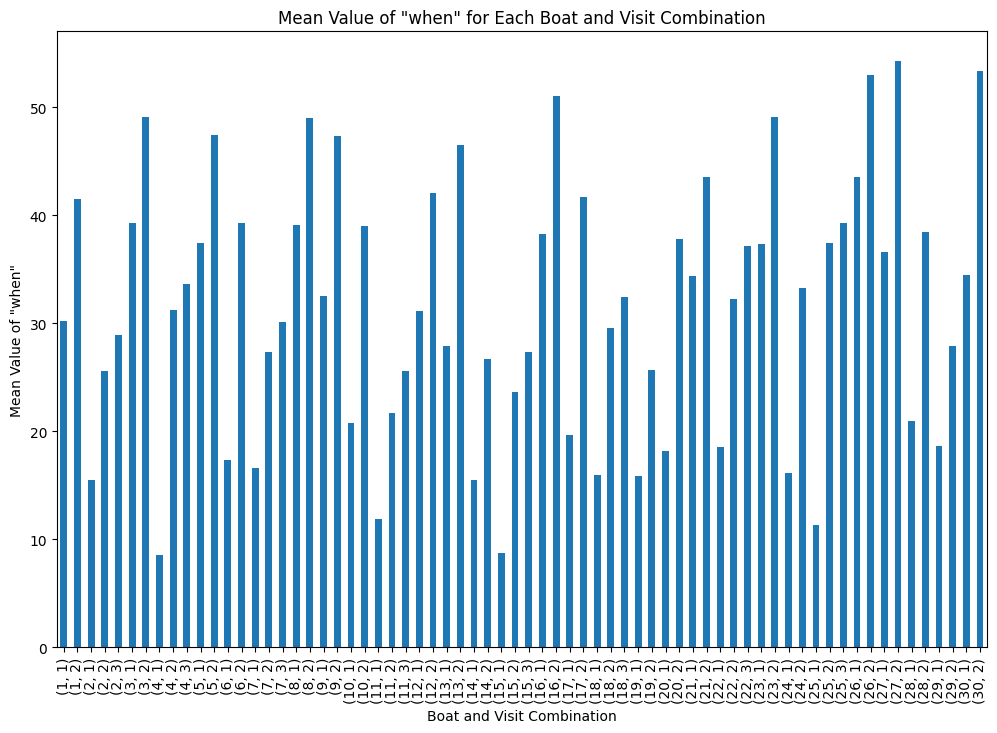

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# calculate mean of 'when' column for each n/c combination
df_mean_when = dataset.groupby(['n', 'c'])['when'].mean()

# create bar plot
ax = df_mean_when.plot(kind='bar', figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Mean Value of "when"')
ax.set_title('Mean Value of "when" for Each Boat and Visit Combination')

# show plot
plt.show()


### What times for the Heuristic and the Local search ?

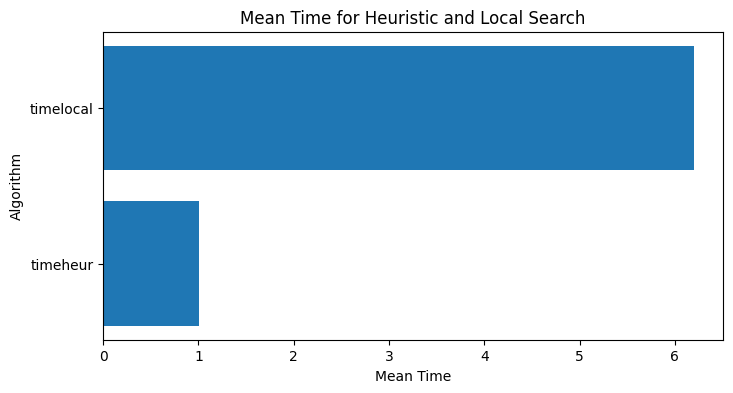

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate mean of timeheur and timelocal across all iterations
mean_timeheur = dataset['timeheur'].mean()
mean_timelocal = dataset['timelocal'].mean()

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(['timeheur', 'timelocal'], [mean_timeheur, mean_timelocal])
ax.set_xlabel('Mean Time')
ax.set_ylabel('Algorithm')
ax.set_title('Mean Time for Heuristic and Local Search')

plt.show()


### Get the cost evolution

In [25]:
dataset[dataset['iter'] == 1]['objectif'].columns

Index(['iter', 'n', 'c', 'port', 'cost_visit', 'delay_cost_visit', 'when',
       'tacticall_chosen', 'tacticboat_chosen', 'penalty_visit',
       'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit',
       'length', 'calls', 'inst', 'objectif', 'cost_solheur',
       'delay_cost_solheur', 'waiting_cost_solheur', 'penalty_solheur',
       'handling_cost_solheur', 'fuel_cost_solheur', 'cost_sollocal',
       'delay_cost_sollocal', 'waiting_cost_sollocal', 'penalty_sollocal',
       'handling_cost_sollocal', 'fuel_cost_sollocal', 'timeheur', 'timelocal',
       'failed'],
      dtype='object')

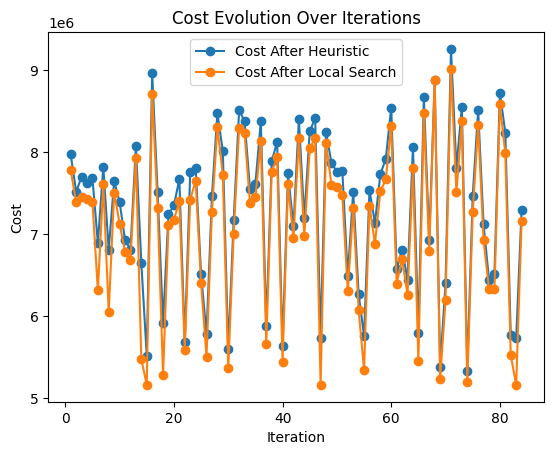

In [28]:
import matplotlib.pyplot as plt


# Group by 'iter' and extract the relevant cost columns
average_costs = dataset.groupby('iter').agg({
    'cost_solheur': 'first',
    'cost_sollocal': 'first',
    'delay_cost_solheur': 'first',
    'delay_cost_sollocal': 'first',
    'waiting_cost_solheur': 'first',
    'waiting_cost_sollocal': 'first',
    'penalty_solheur': 'first',
    'penalty_sollocal': 'first',
    'handling_cost_solheur': 'first',
    'handling_cost_sollocal': 'first',
    'fuel_cost_solheur': 'first',
    'fuel_cost_sollocal': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_costs['iter']


cost_after_heuristic = average_costs['cost_solheur']
cost_after_local_search = average_costs['cost_sollocal']

# Plot the lines
plt.plot(iterations, cost_after_heuristic, label='Cost After Heuristic', marker='o')
plt.plot(iterations, cost_after_local_search, label='Cost After Local Search', marker='o')

# Adding titles and labels
plt.title('Cost Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

# Show plot
plt.show()


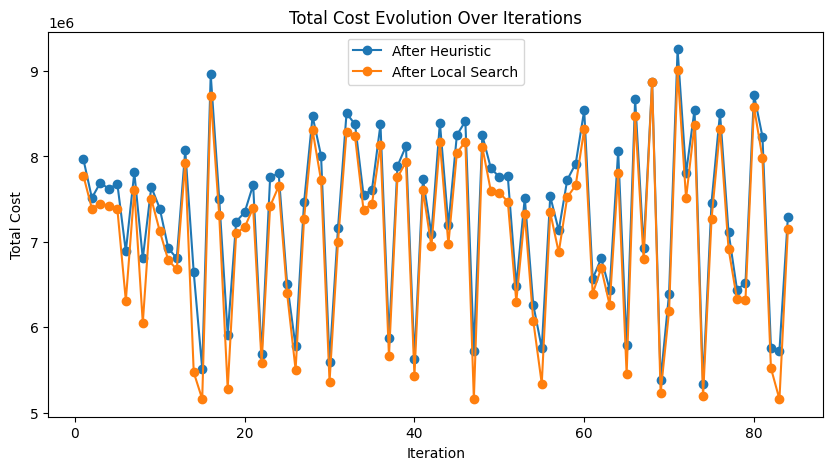

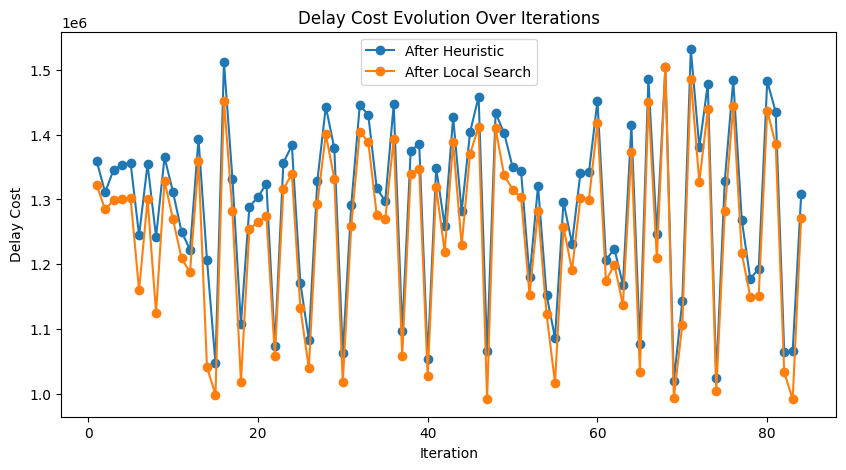

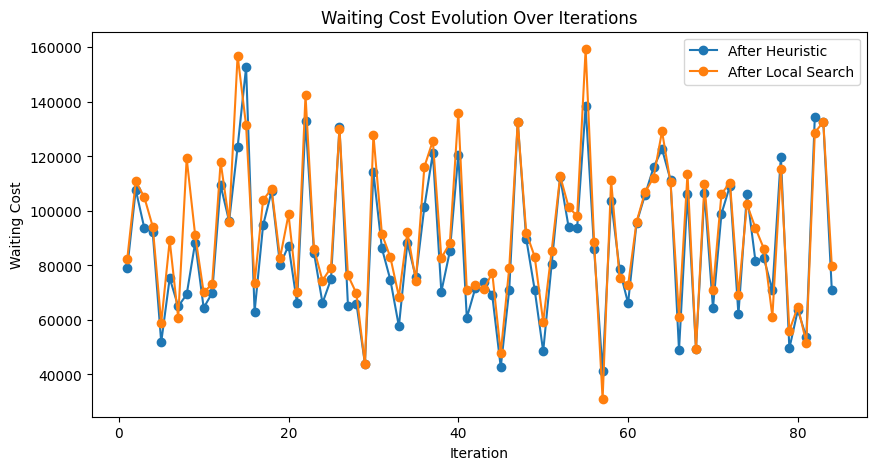

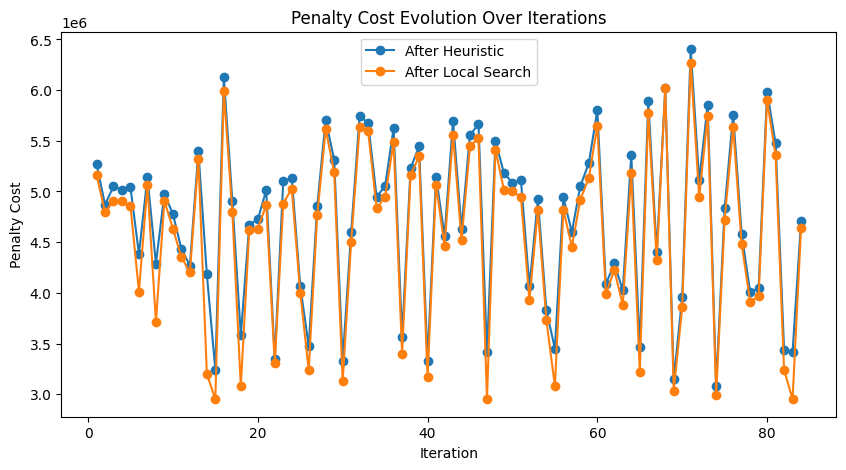

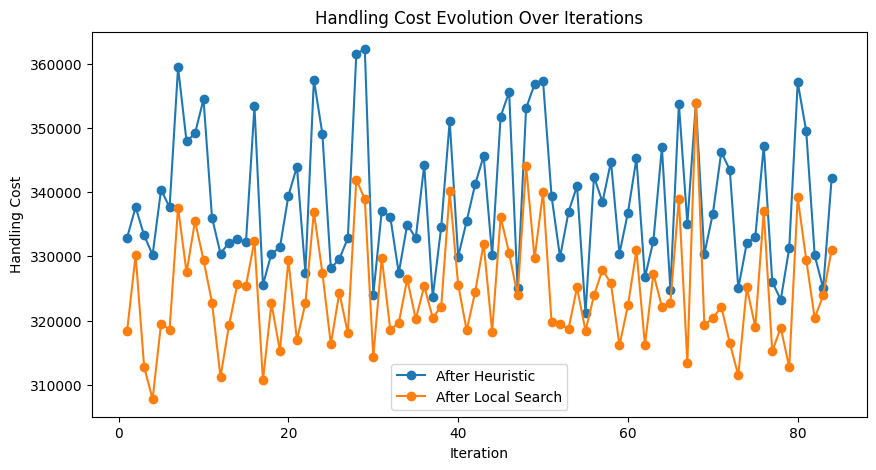

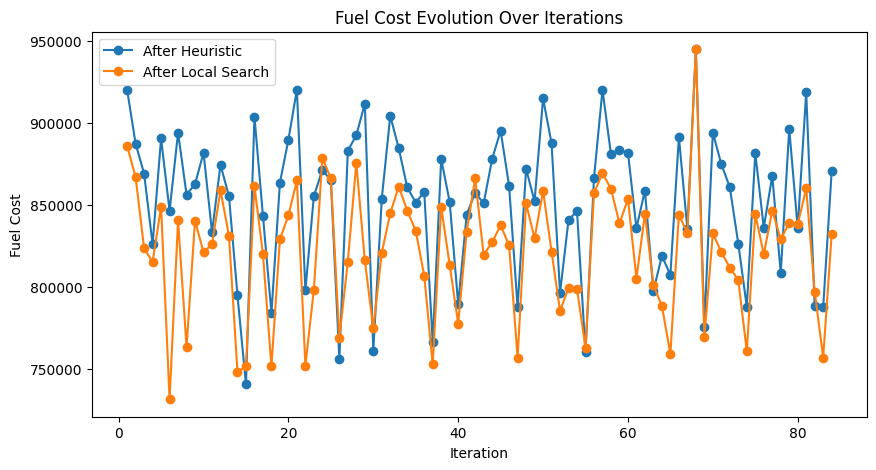

In [29]:
import matplotlib.pyplot as plt

# Costs for plotting
costs_for_plotting = [
    ('cost_solheur', 'cost_sollocal', 'Total Cost'),
    ('delay_cost_solheur', 'delay_cost_sollocal', 'Delay Cost'),
    ('waiting_cost_solheur', 'waiting_cost_sollocal', 'Waiting Cost'),
    ('penalty_solheur', 'penalty_sollocal', 'Penalty Cost'),
    ('handling_cost_solheur', 'handling_cost_sollocal', 'Handling Cost'),
    ('fuel_cost_solheur', 'fuel_cost_sollocal', 'Fuel Cost')
]

# Plotting
for cost_heur, cost_local, cost_name in costs_for_plotting:
    plt.figure(figsize=(10, 5))

    # Plot the lines
    plt.plot(iterations, average_costs[cost_heur], label='After Heuristic', marker='o')
    plt.plot(iterations, average_costs[cost_local], label='After Local Search', marker='o')

    # Adding titles and labels
    plt.title(f'{cost_name} Evolution Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel(cost_name)
    plt.legend()

    # Show plot
    plt.show()


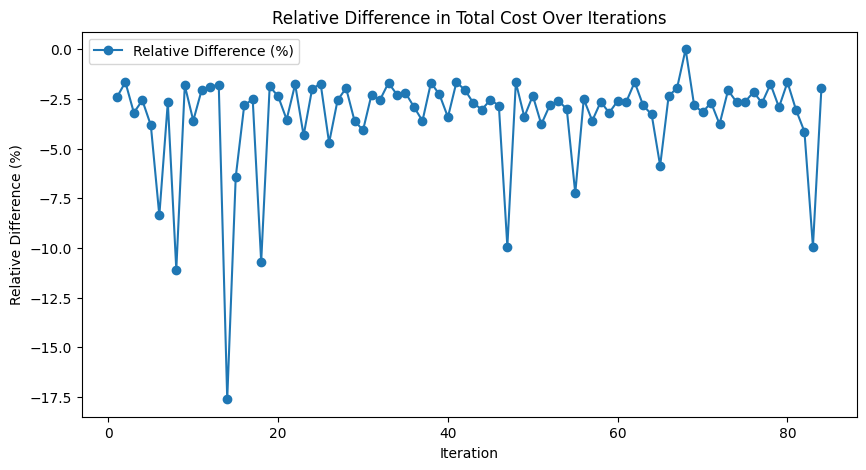

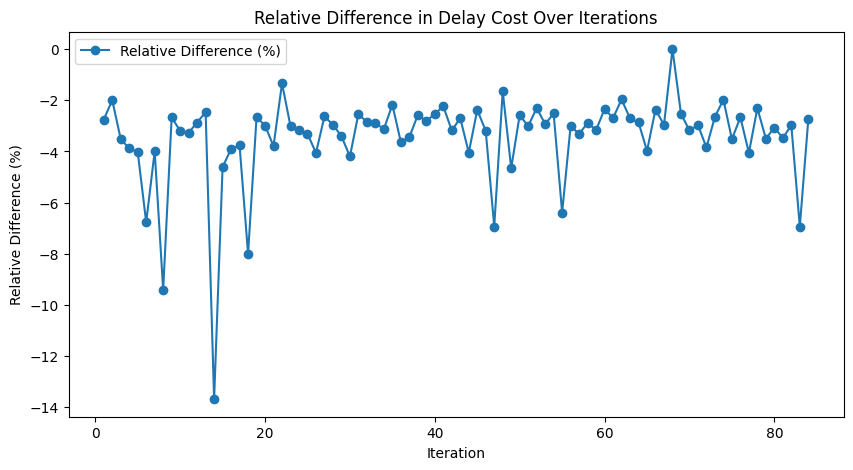

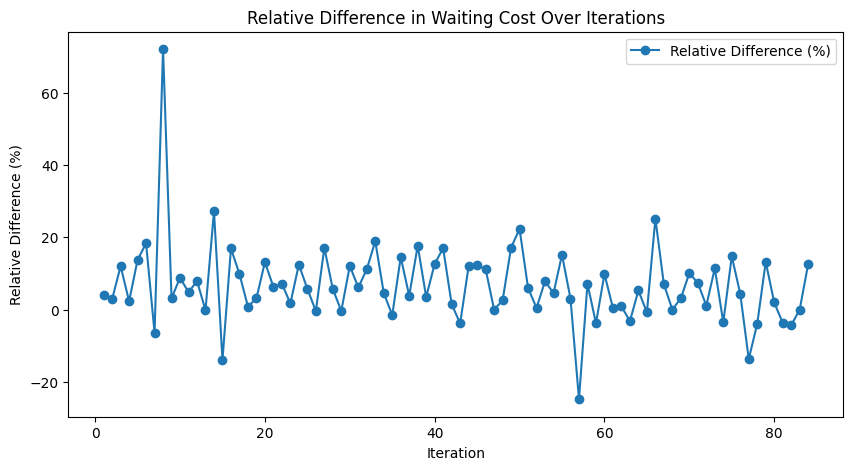

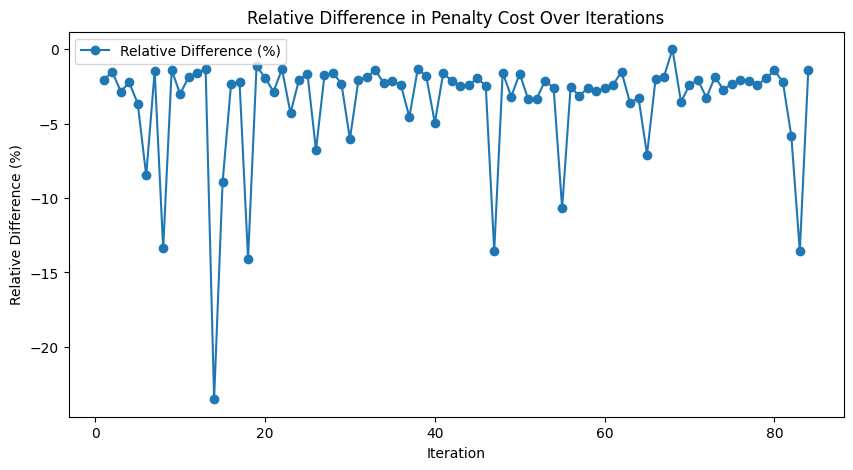

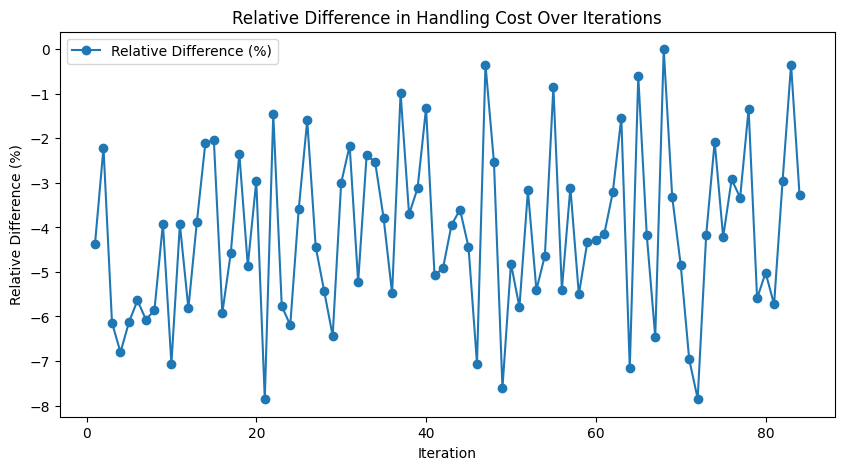

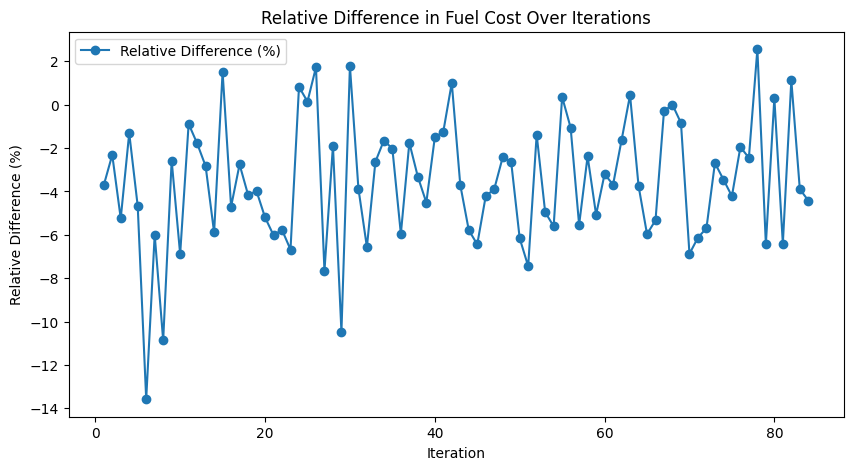

In [30]:
# Plotting
for cost_heur, cost_local, cost_name in costs_for_plotting:
    plt.figure(figsize=(10, 5))

    # Calculate the relative difference as a percentage
    relative_difference = 100 * (average_costs[cost_local] - average_costs[cost_heur]) / average_costs[cost_heur]

    # Plot the line
    plt.plot(iterations, relative_difference, label='Relative Difference (%)', marker='o')

    # Adding titles and labels
    plt.title(f'Relative Difference in {cost_name} Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Relative Difference (%)')
    plt.legend()

    # Show plot
    plt.show()

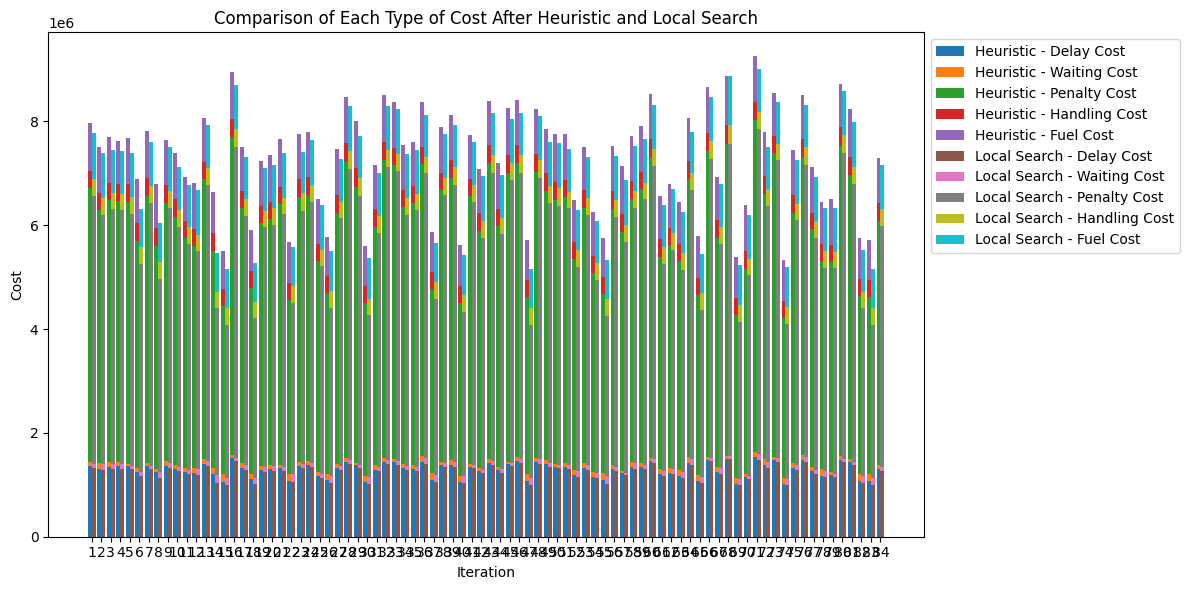

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is loaded as `dataset`

# Group by 'iter' and extract the relevant cost columns
average_costs = dataset.groupby('iter').agg({
    'cost_solheur': 'first',
    'cost_sollocal': 'first',
    'delay_cost_solheur': 'first',
    'delay_cost_sollocal': 'first',
    'waiting_cost_solheur': 'first',
    'waiting_cost_sollocal': 'first',
    'penalty_solheur': 'first',
    'penalty_sollocal': 'first',
    'handling_cost_solheur': 'first',
    'handling_cost_sollocal': 'first',
    'fuel_cost_solheur': 'first',
    'fuel_cost_sollocal': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_costs['iter']

# Costs for plotting
cost_types = [
    ('delay_cost_solheur', 'delay_cost_sollocal', 'Delay Cost'),
    ('waiting_cost_solheur', 'waiting_cost_sollocal', 'Waiting Cost'),
    ('penalty_solheur', 'penalty_sollocal', 'Penalty Cost'),
    ('handling_cost_solheur', 'handling_cost_sollocal', 'Handling Cost'),
    ('fuel_cost_solheur', 'fuel_cost_sollocal', 'Fuel Cost')
]

# Plotting costs for heuristic and local search step in one graph
plt.figure(figsize=(12, 6))

bar_width = 0.4
bar_positions_heuristic = np.arange(len(iterations))
bar_positions_local = bar_positions_heuristic + bar_width

# Plotting costs for heuristic step
bottom = np.zeros(len(iterations))
for heur, local, name in cost_types:
    plt.bar(bar_positions_heuristic, average_costs[heur], width=bar_width, label=f'Heuristic - {name}', bottom=bottom)
    bottom += average_costs[heur]

# Plotting costs for local search step
bottom = np.zeros(len(iterations))
for heur, local, name in cost_types:
    plt.bar(bar_positions_local, average_costs[local], width=bar_width, label=f'Local Search - {name}', bottom=bottom)
    bottom += average_costs[local]

plt.title('Comparison of Each Type of Cost After Heuristic and Local Search')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.xticks(bar_positions_heuristic + bar_width / 2, iterations)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### Main ideas from that already : 

- The reactive GRASP is not reactive at all, too much parameters and not enough simulations to update the probabilities.
- The penalty is really difficult to optimize for the greedy heuristic -> goal of the local search. Can we put more focus on that ?
- Regarding the when value, is it enough random ? If we remove some parameters how can implement the reactive GRASP ? Should it be reactive ? Should we for it to be more random ? 
- Add earliest
- Put hard constraint in CPLEX

Given the number of iterations -> difficult to make it reactive, better to have a fix parameters and optimize it. 